In [3]:
import pandas as pd
from matplotlib import pyplot as plt

**Importing Data**
- skiprows - we skip first 61 rows, as it is "unimportant" text 
- drop([]) rows with indexes

In [4]:
df = pd.read_csv("monthly_in_situ_co2_mlo.csv", skiprows=61, usecols=['Yr', 'Mn', 'CO2'], skipinitialspace=True)
df=df.drop([0,1])
df

,Yr,Mn,CO2
2,1958.0,1.0,-99.99
3,1958.0,2.0,-99.99
4,1958.0,3.0,315.71
5,1958.0,4.0,317.45
6,1958.0,5.0,317.51
...,...,...,...
801,2024.0,8.0,-99.99
802,2024.0,9.0,-99.99
803,2024.0,10.0,-99.99
804,2024.0,11.0,-99.99


**Setting index Column**


1) changing type of columns from int to string

In [5]:
df['Yr'] = df['Yr'].astype(int).astype(str)
df['Mn'] = df['Mn'].astype(int).astype(str)
df


,Yr,Mn,CO2
2,1958,1,-99.99
3,1958,2,-99.99
4,1958,3,315.71
5,1958,4,317.45
6,1958,5,317.51
...,...,...,...
801,2024,8,-99.99
802,2024,9,-99.99
803,2024,10,-99.99
804,2024,11,-99.99


2) Combining Year column and Month column with "-" separator 

In [6]:
df.index= pd.to_datetime(df['Yr']+'-'+df['Mn'])

3) Setting index frequency to Months

In [7]:
df.index.freq = 'MS'

4) Removing unnecessary columns with Year and Month

In [8]:
df =df.drop(columns=['Yr','Mn'])

In [9]:
df

,CO2
1958-01-01,-99.99
1958-02-01,-99.99
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.51
...,...
2024-08-01,-99.99
2024-09-01,-99.99
2024-10-01,-99.99
2024-11-01,-99.99


Ensuring that the CO2 column is type numeric, if coerce then invalid data will be set to NaN  

In [10]:
df['CO2']= pd.to_numeric(df['CO2'], errors='coerce')

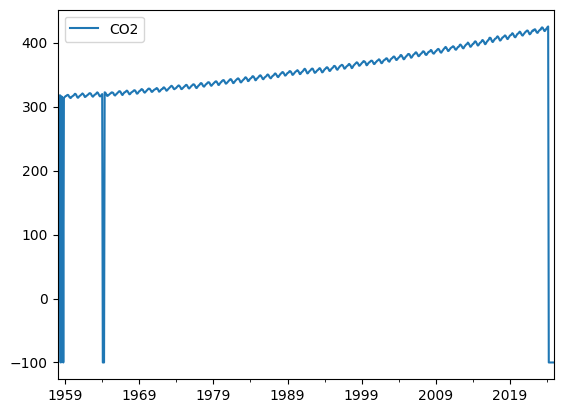

In [11]:
df.plot();

In [12]:
import numpy as np

In our data set -99.99 is a number representing no value, thus using .replace we replace to NaN

In [13]:
df= df.replace(-99.99, np.nan)

In [14]:
df.tail(12)

,CO2
2024-01-01,422.62
2024-02-01,424.35
2024-03-01,425.22
2024-04-01,NaN
2024-05-01,NaN
2024-06-01,NaN
2024-07-01,NaN
2024-08-01,NaN
2024-09-01,NaN
2024-10-01,NaN


In [15]:
df.isna().sum()

CO2    16
dtype: int64

.bfill - backward filling missing values in Data Frame ensurese constancy of the data

In [16]:
df = df.bfill()

In [17]:
df.dropna(inplace=True)

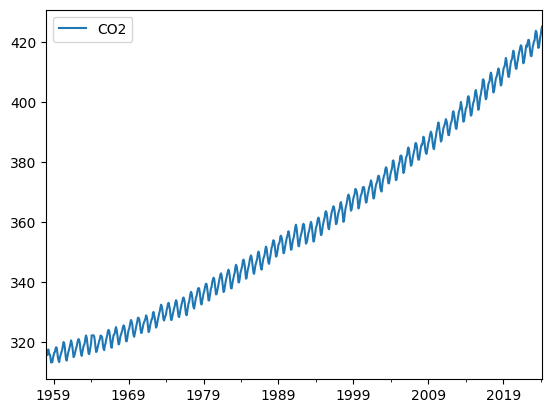

In [18]:
df.plot();

In [19]:
df['CO2'].shift(0)

1958-01-01    315.71
1958-02-01    315.71
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.51
               ...  
2023-11-01    420.12
2023-12-01    421.65
2024-01-01    422.62
2024-02-01    424.35
2024-03-01    425.22
Freq: MS, Name: CO2, Length: 795, dtype: float64

In [20]:
for i in range (12,0,-1):
    print(i)
    df['t='+str(i)] = df['CO2'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [21]:

df.dropna(inplace=True)
df

,CO2,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
1959-01-01,315.58,315.71,315.71,315.71,317.45,317.51,315.87,315.87,314.93,313.21,313.33,313.33,314.67
1959-02-01,316.49,315.71,315.71,317.45,317.51,315.87,315.87,314.93,313.21,313.33,313.33,314.67,315.58
1959-03-01,316.65,315.71,317.45,317.51,315.87,315.87,314.93,313.21,313.33,313.33,314.67,315.58,316.49
1959-04-01,317.72,317.45,317.51,315.87,315.87,314.93,313.21,313.33,313.33,314.67,315.58,316.49,316.65
1959-05-01,318.29,317.51,315.87,315.87,314.93,313.21,313.33,313.33,314.67,315.58,316.49,316.65,317.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,420.12,417.03,418.48,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40
2023-12-01,421.65,418.48,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12
2024-01-01,422.62,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12,421.65
2024-02-01,424.35,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12,421.65,422.62


In [22]:
x = df.iloc[:,1:].values
y= df.iloc[:,0].values

In [47]:
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.model_selection import ParameterGrid

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(df.shape)

(783, 13)


In [52]:
xgb_r = xg.XGBRegressor(random_state=42,n_estimators=200, learning_rate=0.2)
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
train_pred = xgb_r.predict(x_train)
test_pred = xgb_r.predict(x_test)

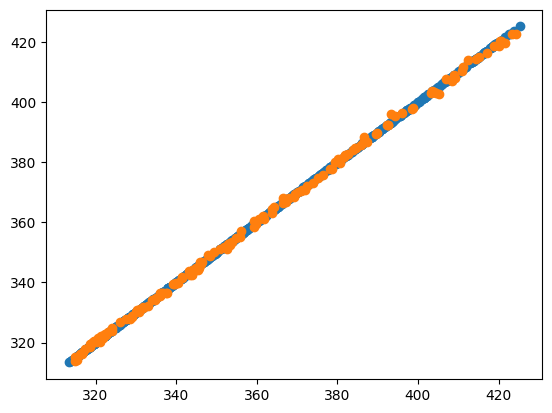

In [54]:
plt.scatter(y_train,train_pred)
plt.scatter(y_test,test_pred)

In [55]:
from sklearn.metrics import mean_absolute_percentage_error

In [56]:
mean_absolute_percentage_error(y_train,train_pred)*100

0.004963130187340889

In [57]:
mean_absolute_percentage_error(y_test,test_pred)*100

0.1570827648539361

In [58]:
def get_first_eval_batch(data, n):
    return data[-n:].reshape(-1,n)

In [59]:
train =df[:-12]
test = df[-12:]

In [60]:
n_lag =12
test_pred_xgb_r =[]
current_batch = get_first_eval_batch(train['CO2'].values,n_lag)

for i in range(len(test)):
    current_pred = xgb_r.predict(current_batch)[0]
    test_pred_xgb_r.append(current_pred)
    current_batch =np.append(current_batch[:,1:],current_pred).reshape(-1,n_lag)
    

In [61]:
test_pred_xgb_r

[422.72922,
 423.77805,
 422.7278,
 421.61722,
 419.55597,
 418.08304,
 418.3976,
 418.585,
 419.18472,
 421.3967,
 422.65097,
 423.7356]

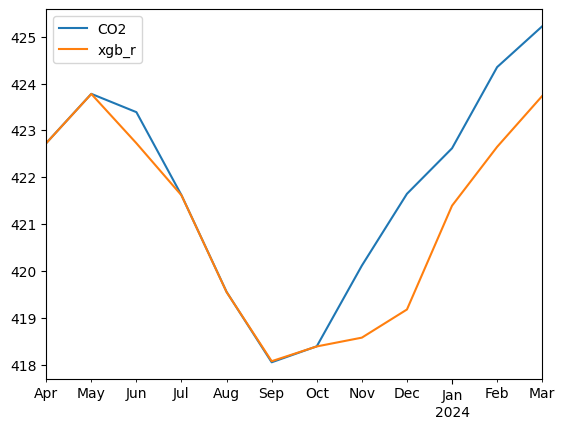

In [63]:
df_comp = test['CO2'].to_frame()
df_comp['xgb_r'] = test_pred_xgb_r
df_comp.plot();

In [64]:
mean_absolute_percentage_error(df_comp['CO2'],df_comp['xgb_r'])*100

0.17947735397356085

In [65]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
co2_train= train['CO2'].values
auto_arima(co2_train, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=528.295, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2537.824, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1741.808, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2544.863, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1231.189, Time=2.12 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=866.566, Time=2.15 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=553.823, Time=5.74 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=573.820, Time=5.80 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1598.108, Time=0.48 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=5.31 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=674.237, Time=7.01 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=540.510, Time=4.32 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=513.148, Time=2.43 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  771
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -240.063
Date:                              Sun, 12 May 2024   AIC                            492.126
Time:                                      20:18:58   BIC                            520.004
Sample:                                           0   HQIC                           502.855
                                              - 771                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3187      0.038     -8.465      0.000      -0.392      -0.245
ma.L2         -0.0948      0.025     -3.739      0.000      -0.144      -0.045
ma.L3         -0.0842      0.023     -3.677      0.000      -0.129      -0.039
ar.S.L12       0.9996      0.000   2915.258      0.000       0.999       1.000
ma.S.L12      -0.8678      0.020    -42.778      0.000      -0.908      -0.828
sigma2         0.1018      0.004     24.754      0.000       0.094       0.110
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               199.71
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.34
Prob(H) (two-sided):                  0.39   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
model = SARIMAX(co2_train, order=(0,1,3), seasonal_order=(1,0,1,12))
fit_SARIMA = model.fit()
fit_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  771
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -240.063
Date:                              Sun, 12 May 2024   AIC                            492.126
Time:                                      20:19:12   BIC                            520.004
Sample:                                           0   HQIC                           502.855
                                              - 771                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3187      0.038     -8.465      0.000      -0.392      -0.245
ma.L2         -0.0948      0.025     -3.739      0.000      -0.144      -0.045
ma.L3         -0.0842      0.023     -3.677      0.000      -0.129      -0.039
ar.S.L12       0.9996      0.000   2915.258      0.000       0.999       1.000
ma.S.L12      -0.8678      0.020    -42.778      0.000      -0.908      -0.828
sigma2         0.1018      0.004     24.754      0.000       0.094       0.110
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               199.71
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.34
Prob(H) (two-sided):                  0.39   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

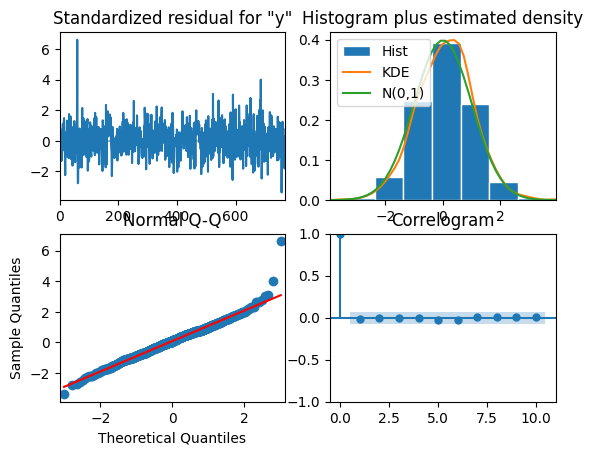

In [68]:
fit_SARIMA.plot_diagnostics();

In [69]:
start =len(train)
end = len(train)+ len(test)-1
prediction_SARMIA = fit_SARIMA.predict(start=start, end= end)

In [70]:
df_comp['SARIMA']= prediction_SARMIA

<Axes: >

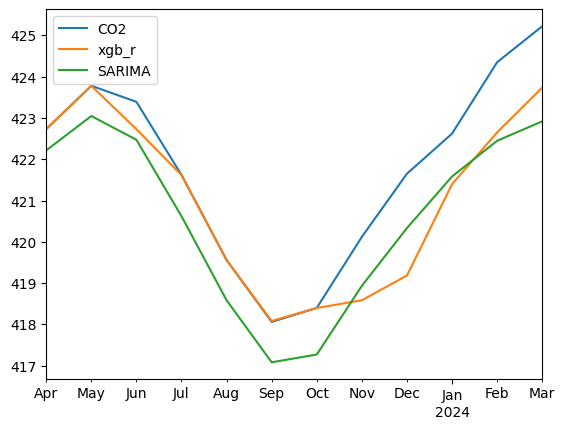

In [71]:
df_comp.plot()

In [72]:
mean_absolute_percentage_error(df_comp['CO2'],df_comp['SARIMA'])*100

0.2762313253411792